In [1]:
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images / 255.0
test_images  = test_images / 255.0

In [6]:
model = models.Sequential([layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), activation = 'relu'),
                           layers.MaxPooling2D((2, 2)),
                           layers.Conv2D(64, (3, 3), activation = 'relu'),
                           layers.Flatten(),
                           layers.Dense(64, activation = 'relu'),
                           layers.Dense(10, activation = 'softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [7]:
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [8]:
model.fit(train_images, train_labels, epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1453 - accuracy: 0.9561
Epoch 2/8
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0463 - accuracy: 0.9858
Epoch 3/8
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0327 - accuracy: 0.9897
Epoch 4/8
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0251 - accuracy: 0.9919
Epoch 5/8
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 6/8
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0154 - accuracy: 0.9950
Epoch 7/8
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0131 - accuracy: 0.9957
Epoch 8/8
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0107 - accuracy: 0.9966


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0318 - accuracy: 0.9914


In [10]:
print(test_acc)

0.9914000034332275


In [11]:
dir_path = "handwritten_nums/"
listt = os.listdir(dir_path)

img_set = []
for n in range(len(listt)):
    img_sub = cv2.imread(dir_path + listt[n], cv2.IMREAD_GRAYSCALE)
    img_sub = (255 - img_sub) / 255.0
    img_set.insert(n, img_sub)

In [12]:
listt

['nums_0_01.png',
 'nums_1_01.png',
 'nums_2_01.png',
 'nums_3_01.png',
 'nums_4_01.png',
 'nums_5_01.png',
 'nums_6_01.png',
 'nums_7_01.png',
 'nums_8_01.png',
 'nums_9_01.png']

In [13]:
img_set = np.array(img_set)

x_test_my = img_set.reshape(img_set.shape + (1,))
y_test_my = np.array([int(path[5:6]) for path in listt])

In [14]:
model.evaluate(x_test_my, y_test_my, verbose = 0)

[0.5786596536636353, 0.8999999761581421]

In [16]:
[pred_sub.argmax() for pred_sub in model.predict(x_test_my)]

[0, 1, 2, 3, 4, 5, 6, 7, 6, 9]

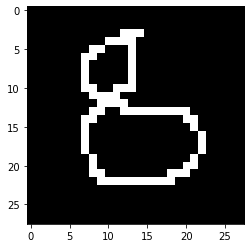

In [19]:
import matplotlib.pyplot as plt
plt.imshow(img_set[8], cmap = 'gray')
plt.show()

In [22]:
dir_path = "numbers_new/"
listt = os.listdir(dir_path)

img_set = []
for n in range(len(listt)):
    img_sub = cv2.imread(dir_path + listt[n], cv2.IMREAD_GRAYSCALE)
    img_sub = (255 - img_sub) / 255.0
    img_set.insert(n, img_sub)
    
img_set = np.array(img_set)

x_test_my = img_set.reshape(img_set.shape + (1,))
y_test_my = np.array([int(path[4:5]) for path in listt])

[pred_sub.argmax() for pred_sub in model.predict(x_test_my)]

[0, 1, 2, 3, 4, 5, 0, 7, 8, 4]